In [339]:
import pandas as pd
import numpy as np

In [340]:
data = pd.read_csv('predicted_data_custom.csv')
data = data.drop('Unnamed: 0', 1)
data = data.drop('index', 1)
data.set_index(['GAME_DATE', 'HOME', 'AWAY'])


,,,Results,Odds1,Odds2,Score,prediction
GAME_DATE,HOME,AWAY,,,,,
2017-03-11,LAC,PHI,1.0,1.06,11.06,112:100,0.759338
2015-12-10,CHI,LAC,1.0,2.03,1.84,83:80,0.470088
2010-02-18,CLE,DEN,0.0,1.33,3.44,116:118,0.757308
2011-02-10,BOS,LAL,0.0,1.74,2.14,86:92,0.585559
2012-03-23,ATL,BKN,1.0,1.31,3.58,93:84,0.569502
...,...,...,...,...,...,...,...
2012-02-20,UTA,SAS,0.0,2.19,1.71,102:106,0.426395
2018-03-01,SAC,BKN,1.0,2.19,1.72,116:111,0.594769
2013-01-11,NYK,CHI,0.0,1.55,2.54,101:108,0.690552


In [341]:
data['odds1_true'] = 1/ pd.to_numeric(data['Odds1'],errors='coerce')
data['odds2_true'] = 1/ pd.to_numeric(data['Odds2'], errors='coerce')
data['odds_total'] = data['odds1_true'] + data['odds2_true']
data['pred_away'] = 1 - pd.to_numeric(data['prediction'], errors='coerce')
data.rename(columns={'prediction': 'pred_home'}, inplace=True)
data

,Results,GAME_DATE,HOME,AWAY,Odds1,Odds2,Score,pred_home,odds1_true,odds2_true,odds_total,pred_away
0,1.0,2017-03-11,LAC,PHI,1.06,11.06,112:100,0.759338,0.943396,0.090416,1.033812,0.240662
1,1.0,2015-12-10,CHI,LAC,2.03,1.84,83:80,0.470088,0.492611,0.543478,1.036089,0.529912
2,0.0,2010-02-18,CLE,DEN,1.33,3.44,116:118,0.757308,0.751880,0.290698,1.042577,0.242692
3,0.0,2011-02-10,BOS,LAL,1.74,2.14,86:92,0.585559,0.574713,0.467290,1.042002,0.414441
4,1.0,2012-03-23,ATL,BKN,1.31,3.58,93:84,0.569502,0.763359,0.279330,1.042688,0.430498
...,...,...,...,...,...,...,...,...,...,...,...,...
2846,0.0,2012-02-20,UTA,SAS,2.19,1.71,102:106,0.426395,0.456621,0.584795,1.041416,0.573605
2847,1.0,2018-03-01,SAC,BKN,2.19,1.72,116:111,0.594769,0.456621,0.581395,1.038016,0.405231
2848,0.0,2013-01-11,NYK,CHI,1.55,2.54,101:108,0.690552,0.645161,0.393701,1.038862,0.309448
2849,1.0,2014-04-02,SAC,LAL,1.28,3.94,107:102,0.710855,0.781250,0.253807,1.035057,0.289145


In [342]:
cols = list(data.columns.values)
cols

['Results',
 'GAME_DATE',
 'HOME',
 'AWAY',
 'Odds1',
 'Odds2',
 'Score',
 'pred_home',
 'odds1_true',
 'odds2_true',
 'odds_total',
 'pred_away']

In [343]:
data = data[[
 'GAME_DATE',
 'HOME',
 'AWAY','Score',
 'Odds1',
 'Odds2',
 'odds_total',
 'odds1_true',
 'odds2_true',
 'pred_home',
 'pred_away',
    'Results']]
data.set_index(['GAME_DATE', 'HOME', 'AWAY'], inplace=True)
data

,,,Score,Odds1,Odds2,odds_total,odds1_true,odds2_true,pred_home,pred_away,Results
GAME_DATE,HOME,AWAY,,,,,,,,,
2017-03-11,LAC,PHI,112:100,1.06,11.06,1.033812,0.943396,0.090416,0.759338,0.240662,1.0
2015-12-10,CHI,LAC,83:80,2.03,1.84,1.036089,0.492611,0.543478,0.470088,0.529912,1.0
2010-02-18,CLE,DEN,116:118,1.33,3.44,1.042577,0.751880,0.290698,0.757308,0.242692,0.0
2011-02-10,BOS,LAL,86:92,1.74,2.14,1.042002,0.574713,0.467290,0.585559,0.414441,0.0
2012-03-23,ATL,BKN,93:84,1.31,3.58,1.042688,0.763359,0.279330,0.569502,0.430498,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2012-02-20,UTA,SAS,102:106,2.19,1.71,1.041416,0.456621,0.584795,0.426395,0.573605,0.0
2018-03-01,SAC,BKN,116:111,2.19,1.72,1.038016,0.456621,0.581395,0.594769,0.405231,1.0
2013-01-11,NYK,CHI,101:108,1.55,2.54,1.038862,0.645161,0.393701,0.690552,0.309448,0.0


In [344]:
percentile = [0.6, 0.7,0.8, 0.9]
for i in percentile:
    print(data.pred_home.quantile(i))

    #print(data.pred_away.quantile(i))
data.pred_home.mean()

0.6555391550064087
0.7047616243362427
0.7550272941589355
0.813075840473175


0.5987451721998066

array([[<AxesSubplot:title={'center':'pred_away'}>]], dtype=object)

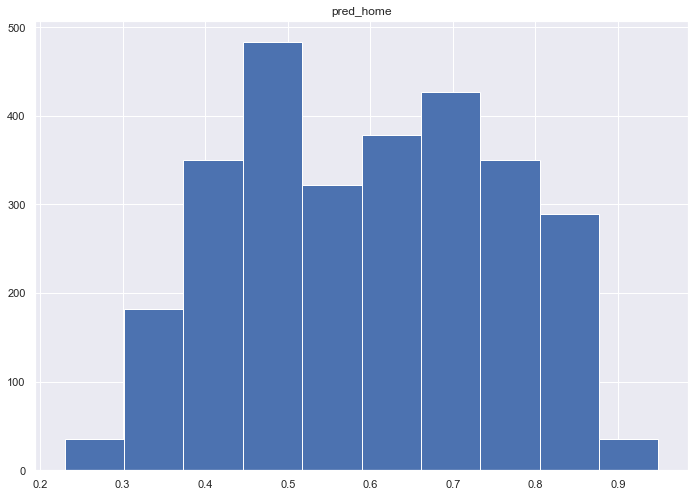

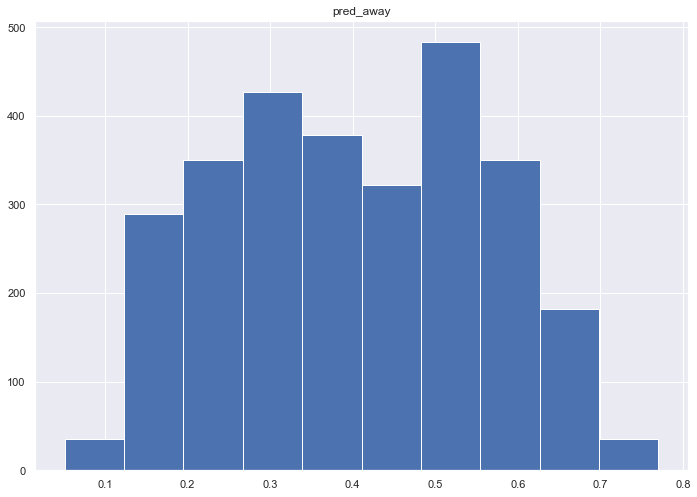

In [345]:
data.hist(column='pred_home')
data.hist(column='pred_away')

In [346]:
data[['odds1_true', 'odds2_true']].astype(float)
data['odds1_true_02'] = pd.to_numeric(data['odds1_true'],errors='coerce') + 0.02
data['odds2_true_02'] = pd.to_numeric(data['odds2_true'],errors='coerce') + 0.02
data['diff_pred_odds_h'] = data['pred_home'] - data['odds1_true']
data['diff_pred_odds_a'] = data['pred_away'] - data['odds2_true']


<ipython-input-346-6b651ad3660d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['odds1_true_02'] = pd.to_numeric(data['odds1_true'],errors='coerce') + 0.02
<ipython-input-346-6b651ad3660d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['odds2_true_02'] = pd.to_numeric(data['odds2_true'],errors='coerce') + 0.02


In [347]:
def roi1h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['diff_pred_odds_h'] >= 0.10:
            return None
        elif df['pred_home'] >= 0.55 and df['pred_home'] <0.6:
            return df['Results'] * df['Odds1'] * 1 -1
        
def roi2h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['diff_pred_odds_h'] >= 0.10:
            return None
        elif df['pred_home']> 0.6 and df['pred_home'] <=0.7:
            return df['Results'] * df['Odds1'] * 2 - 2
        
def roi3h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['diff_pred_odds_h'] >= 0.10:
            return None
        elif df['pred_home']> 0.7:
            return df['Results'] * df['Odds1'] * 3- 3
        
def roi1a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['diff_pred_odds_a'] >= 0.10:
            return None
        elif df['pred_away']>= 0.55 and df['pred_away'] <0.6:
            return (1- df['Results']) * df['Odds2'] * 1 -1
        
def roi2a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['diff_pred_odds_a'] >= 0.10:
            return None
        elif df['pred_away']> 0.6 and df['pred_away'] <=0.7:
            return (1 - df['Results']) * df['Odds2'] * 2 -2
        
def roi3a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['diff_pred_odds_a'] >= 0.10:
            return None
        elif df['pred_away']> 0.7:
            return (1 - df['Results']) * df['Odds2'] * 3 -3
     

data.sort_values(by='GAME_DATE')
data['roi1h'] = data.apply(roi1h, axis=1)
data['roi2h'] = data.apply(roi2h, axis=1)
data['roi3h'] = data.apply(roi3h, axis=1)
data['roi1a'] = data.apply(roi1a, axis=1)
data['roi2a'] = data.apply(roi2a, axis=1)
data['roi3a'] = data.apply(roi3a, axis=1)
data['roi_total'] = data.fillna(0)['roi1h'] + data.fillna(0)['roi2h'] + data.fillna(0)['roi3h'] + data.fillna(0)['roi1a'] + data.fillna(0)['roi2a'] + data.fillna(0)['roi3a']
data['roi_total_cum'] = data['roi_total'].cumsum()
data

,,,Score,Odds1,Odds2,odds_total,odds1_true,odds2_true,pred_home,pred_away,Results,odds1_true_02,...,diff_pred_odds_h,diff_pred_odds_a,roi1h,roi2h,roi3h,roi1a,roi2a,roi3a,roi_total,roi_total_cum
GAME_DATE,HOME,AWAY,,,,,,,,,,,,,,,,,,,,,
2017-03-11,LAC,PHI,112:100,1.06,11.06,1.033812,0.943396,0.090416,0.759338,0.240662,1.0,0.963396,...,-0.184058,0.150246,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00
2015-12-10,CHI,LAC,83:80,2.03,1.84,1.036089,0.492611,0.543478,0.470088,0.529912,1.0,0.512611,...,-0.022523,-0.013566,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00
2010-02-18,CLE,DEN,116:118,1.33,3.44,1.042577,0.751880,0.290698,0.757308,0.242692,0.0,0.771880,...,0.005429,-0.048006,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00
2011-02-10,BOS,LAL,86:92,1.74,2.14,1.042002,0.574713,0.467290,0.585559,0.414441,0.0,0.594713,...,0.010846,-0.052849,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00
2012-03-23,ATL,BKN,93:84,1.31,3.58,1.042688,0.763359,0.279330,0.569502,0.430498,1.0,0.783359,...,-0.193856,0.151168,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-02-20,UTA,SAS,102:106,2.19,1.71,1.041416,0.456621,0.584795,0.426395,0.573605,0.0,0.476621,...,-0.030226,-0.011190,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.23
2018-03-01,SAC,BKN,116:111,2.19,1.72,1.038016,0.456621,0.581395,0.594769,0.405231,1.0,0.476621,...,0.138148,-0.176165,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.23
2013-01-11,NYK,CHI,101:108,1.55,2.54,1.038862,0.645161,0.393701,0.690552,0.309448,0.0,0.665161,...,0.045391,-0.084253,NaN,-2.0,NaN,NaN,NaN,NaN,-2.0,10.23


In [348]:
data.reset_index(inplace=True)
data['roi_total'] = data['roi_total'].replace(0, np.nan)
data['roi_total_cum'] = data['roi_total'].cumsum()
data['roi1h_cum'] = data['roi1h'].cumsum()
data['roi2h_cum'] = data['roi2h'].cumsum()
data['roi3h_cum'] = data['roi3h'].cumsum()
data['roi1a_cum'] = data['roi1a'].cumsum()
data['roi2a_cum'] = data['roi2a'].cumsum()
data['roi3a_cum'] = data['roi3a'].cumsum()
data_roi = data[['roi1h_cum','roi2h_cum','roi3h_cum','roi1a_cum','roi2a_cum','roi3a_cum','roi_total_cum','GAME_DATE']]
#data = data.sort_values(by='GAME_DATE')

In [349]:
#data.to_datetime('GAME_DATE')
data_roi.sort_values(by='GAME_DATE', inplace=True)
data_roi.set_index('GAME_DATE', inplace=True)
data_roi


<ipython-input-349-134a814f14b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_roi.sort_values(by='GAME_DATE', inplace=True)


,roi1h_cum,roi2h_cum,roi3h_cum,roi1a_cum,roi2a_cum,roi3a_cum,roi_total_cum
GAME_DATE,,,,,,,
2008-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-10,NaN,NaN,-12.36,NaN,NaN,NaN,19.21


<AxesSubplot:xlabel='GAME_DATE'>

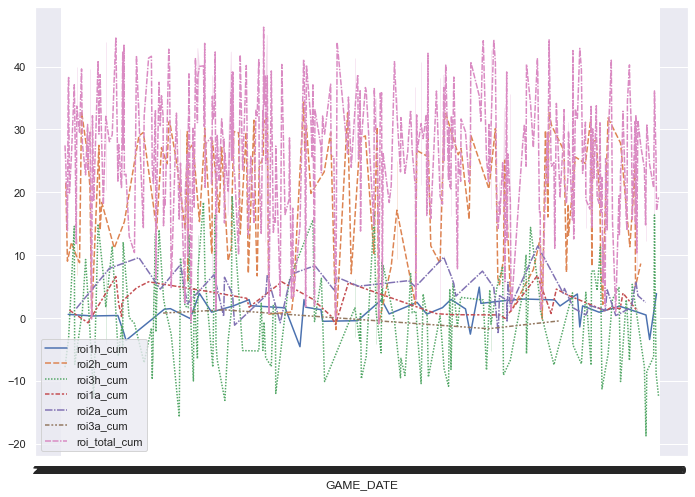

In [350]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data = data_roi )

In [328]:
data.to_csv('pred_stats.csv')